In [1]:
import numpy as np 
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"sms"})
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df["length"]=df.sms.apply(len)
df.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

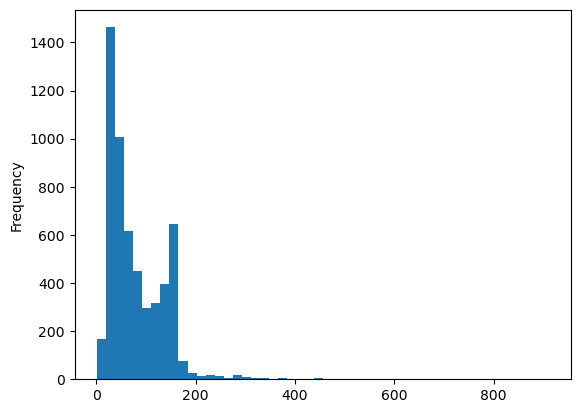

In [13]:
df.length.plot(bins=50, kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

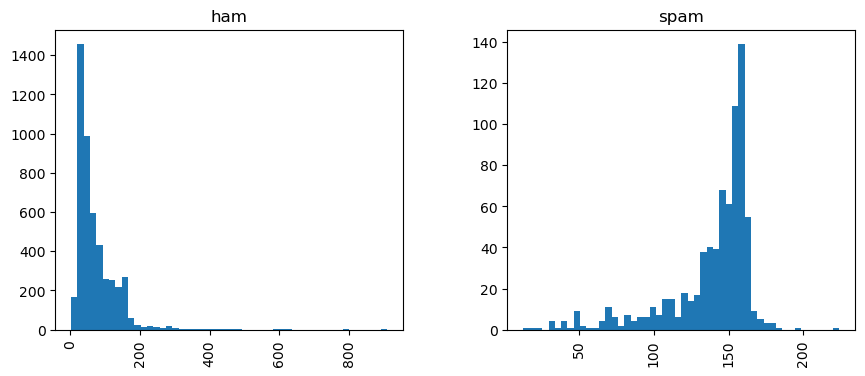

In [14]:
df.hist(column='length', by='label', bins=50,figsize=(10,4))

In [31]:
# Categorize lengths into ranges
bins = [0, 50, 100, 150, 200]
labels = ['0-50', '50-100', '100-150', '150-200']
df['length_category'] = pd.cut(df['length'], bins=bins, labels=labels, right=False)

In [32]:
# Create separate DataFrames for each label
ham_df = df[df['label'] == 'ham']
spam_df = df[df['label'] == 'spam']


# Calculate the proportions for each category
ham_proportions = ham_df['length_category'].value_counts(normalize=True)
spam_proportions = spam_df['length_category'].value_counts(normalize=True)


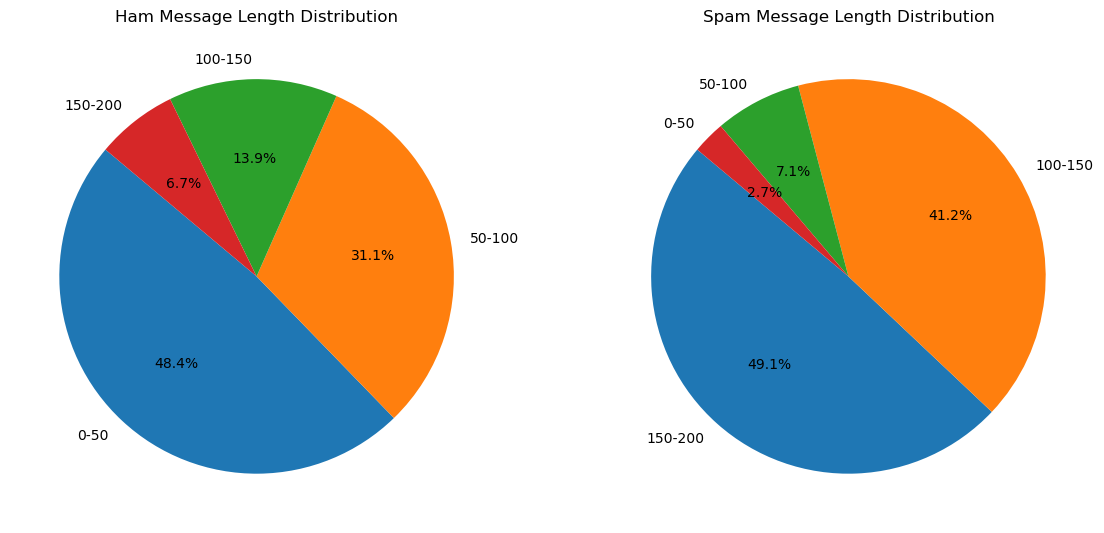

In [33]:
# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(ham_proportions, labels=ham_proportions.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Ham Message Length Distribution')

axes[1].pie(spam_proportions, labels=spam_proportions.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Spam Message Length Distribution')

plt.show()

In [34]:
df.loc[:,'label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head()

(5572, 4)


,label,sms,length,length_category
0,0,"Go until jurong point, crazy.. Available only ...",111,100-150
1,0,Ok lar... Joking wif u oni...,29,0-50
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,150-200
3,0,U dun say so early hor... U c already then say...,49,0-50
4,0,"Nah I don't think he goes to usf, he lives aro...",61,50-100


Implementation of Bag of Words Approach

In [36]:
documents = [
        'Hello, how are you?', 'Win a free iPhone!',
        'This is a test message.', 'Get discount on your next purchase!',
        'Congratulations! You won a lottery!', 'Free tickets for you!'
    ]

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you?', 'win a free iphone!', 'this is a test message.', 'get discount on your next purchase!', 'congratulations! you won a lottery!', 'free tickets for you!']


In [38]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'win a free iphone',
 'this is a test message',
 'get discount on your next purchase',
 'congratulations you won a lottery',
 'free tickets for you']

In [39]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'a', 'free', 'iphone'],
 ['this', 'is', 'a', 'test', 'message'],
 ['get', 'discount', 'on', 'your', 'next', 'purchase'],
 ['congratulations', 'you', 'won', 'a', 'lottery'],
 ['free', 'tickets', 'for', 'you']]

In [40]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 1, 'a': 1, 'free': 1, 'iphone': 1}),
 Counter({'this': 1, 'is': 1, 'a': 1, 'test': 1, 'message': 1}),
 Counter({'get': 1,
          'discount': 1,
          'on': 1,
          'your': 1,
          'next': 1,
          'purchase': 1}),
 Counter({'congratulations': 1, 'you': 1, 'won': 1, 'a': 1, 'lottery': 1}),
 Counter({'free': 1, 'tickets': 1, 'for': 1, 'you': 1})]


Implementing Bag of Words in scikit-learn

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

Data preprocessing with CountVectorizer()

In [42]:
count_vector.fit(documents)
count_vector.get_feature_names_out()

array(['are', 'congratulations', 'discount', 'for', 'free', 'get',
       'hello', 'how', 'iphone', 'is', 'lottery', 'message', 'next', 'on',
       'purchase', 'test', 'this', 'tickets', 'win', 'won', 'you', 'your'],
      dtype=object)

In [43]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]],
      dtype=int64)

In [44]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names_out())
frequency_matrix

,are,congratulations,discount,for,free,get,hello,how,iphone,is,...,next,on,purchase,test,this,tickets,win,won,you,your
0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms'], df['label'],test_size=0.20, random_state=42)

In [46]:
X_train.shape

(4457,)

In [47]:
X_train

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: sms, Length: 4457, dtype: object

In [48]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)